In [30]:
options(warn = -1)
library(readxl)
library(dplyr)
library(stringr)

library(caret)
library(nnet)
library(e1071)
library(randomForest)
library(party)

In [67]:
par(family = 'AppleGothic', bg = '#fafafa')

m <- read_excel('../Data/서울_사업밀도.xls')

n <- read.csv('../Data/cafe_seoul_analysis.csv')

tx <- n[,2:4]

m$자치구 <- paste(m$자치구, m$동)
m <- subset(m, 동 != '합계' & 동 != '소계' & 동 != '둔촌1동')
m$면적비 <- m$사업체수 / m$사업체밀도
m <- arrange(m[c(2,11)], 자치구)

df <- read.csv("../Data/cafe_data.csv")[,2:23]


for(i in 3:22){
  df[,i] <- as.numeric(unlist(df[,i]))
}
colnames(df) <- c('년도','동','한식','용달운송','부동산','의류점','술집','미용','슈퍼마켓','분식','카페','세탁소','노래방','편의점','치킨','자동차수리','야채가게','정육점','중국집','당구장','제과점','PC방')
head(df)
df <- arrange(df, 년도,동)[,3:22]
df <- data.frame(df, n[,6:ncol(n)])


# 면적으로 나눠 비율화
df[,1:23] <- df[,1:23] / m$면적비


# # 정규화
# for (i in 1:23){
#   df[,i] <- scale(df[,i])
# }

data <- data.frame(tx , df) 

head(data)
data[1900,]

년도,동,한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,분식,...,노래방,편의점,치킨,자동차수리,야채가게,정육점,중국집,당구장,제과점,PC방
2015,종로구 사직동,334,17,56,45,91,22,34,43,...,12,28,12,5,5,2,22,10,20,3
2015,종로구 삼청동,64,8,2,59,6,1,16,23,...,0,9,0,0,0,0,3,0,10,0
2015,종로구 부암동,27,13,14,14,12,9,9,11,...,2,9,2,8,0,0,5,1,3,1
2015,종로구 평창동,60,17,31,15,27,17,13,8,...,2,6,3,4,2,6,6,2,7,2
2015,종로구 무악동,12,329,10,4,3,10,5,7,...,2,4,4,2,2,2,2,0,2,2
2015,종로구 교남동,28,13,15,8,4,5,6,2,...,3,6,4,1,0,0,2,1,2,2


기간,자치구,동,한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,...,당구장,제과점,PC방,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
2015,강남구,개포1동,10.23077,29.905325,33.05325,7.082840,0.000000,15.73964,11.017751,...,0.000000,0.7869822,0.0000000,385.6213,1333.148,458.0237,102.0,48.50,94.75,47
2015,강남구,개포2동,22.33921,9.175034,20.34464,5.584803,7.978290,13.16418,5.584803,...,1.595658,2.7924016,0.3989145,359.8209,1382.638,793.0421,99.0,48.50,94.75,47
2015,강남구,개포4동,67.76221,28.178344,35.55839,17.443737,12.747346,21.46921,6.038217,...,6.038217,3.3545648,3.3545648,1612.2038,8320.662,2735.3121,98.5,43.00,94.75,47
2015,강남구,논현1동,254.38802,14.399322,154.39273,79.996233,81.596157,78.39631,27.998681,...,11.199473,10.3995103,6.3996986,4615.7826,35021.551,16250.4347,86.0,43.00,94.75,47
2015,강남구,논현2동,238.10758,3.401537,94.56272,53.744282,69.391351,46.26090,22.450143,...,10.204610,19.0486061,6.8030736,3898.8415,44411.825,18600.2836,87.5,43.25,94.75,47
2015,강남구,대치1동,58.23221,2.531835,84.81648,16.456929,8.861423,36.71161,10.127341,...,2.531835,15.1910112,7.5955056,1282.3745,8991.813,5030.7566,93.0,47.25,94.75,47


,기간,자치구,동,한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,...,당구장,제과점,PC방,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
1900,2019,마포구,연남동,164.0522,60.93368,74.9953,57.80888,168.7394,79.68251,14.06162,...,1.562402,51.55927,3.124804,2992,10797.76,4955.939,62.5,47.75,108.5,53.25


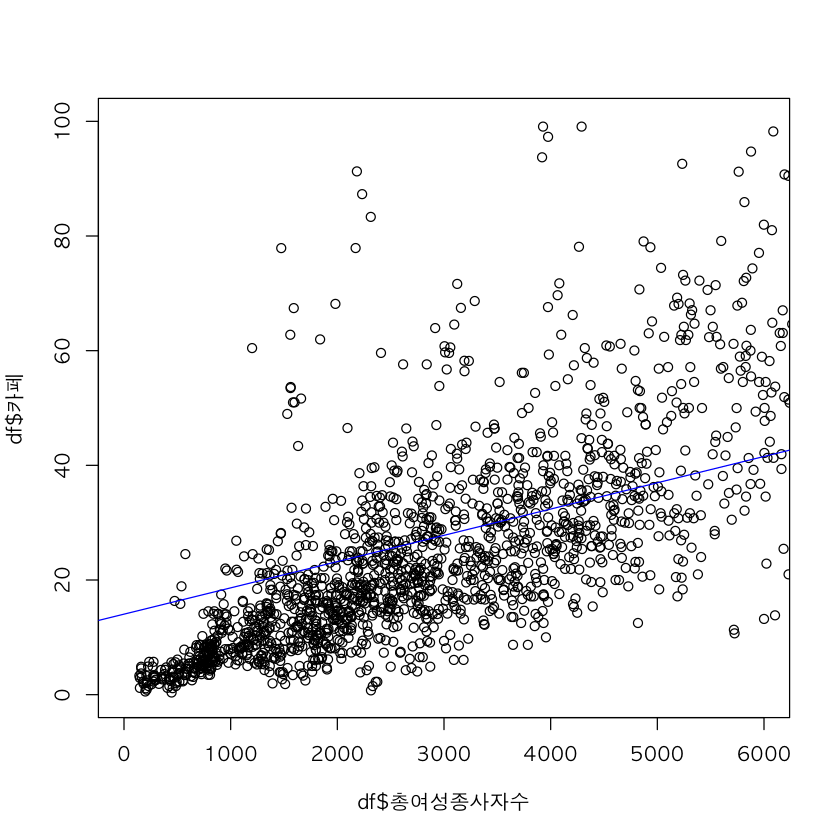

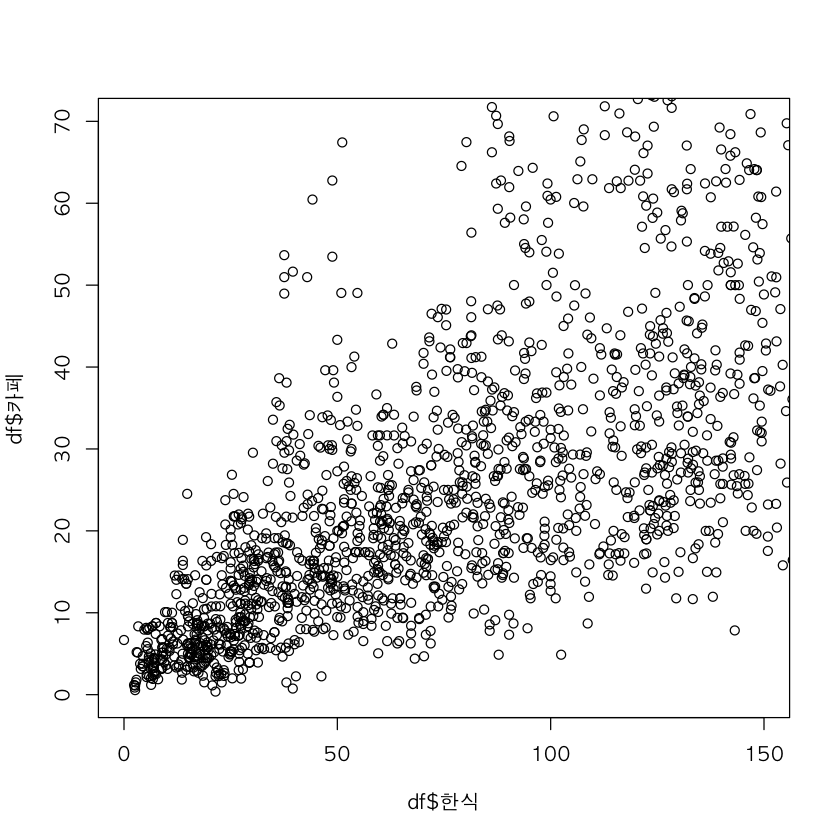

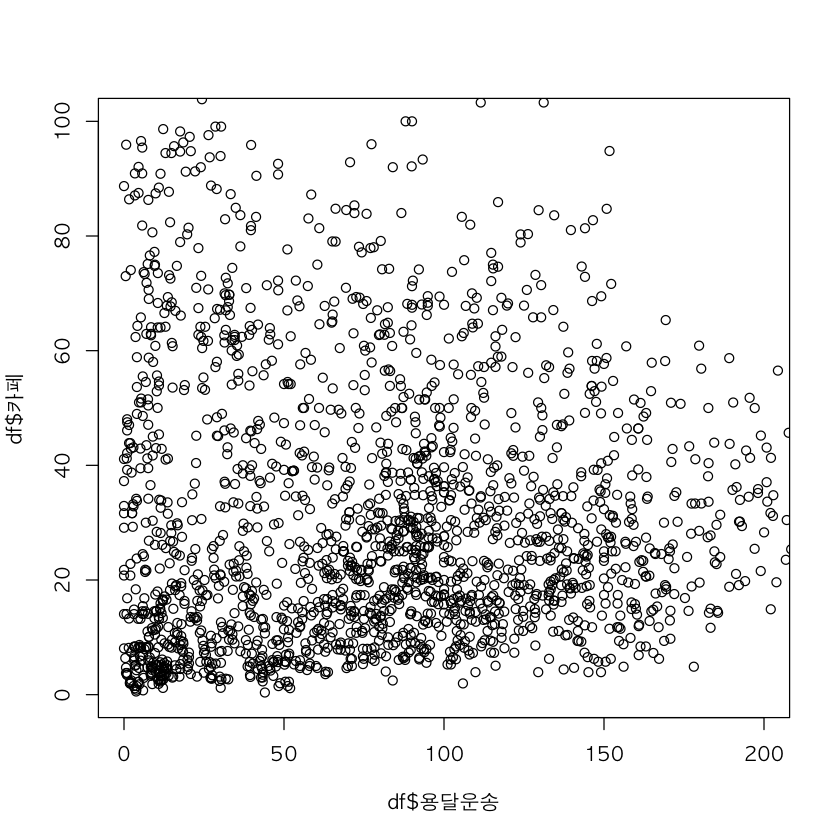

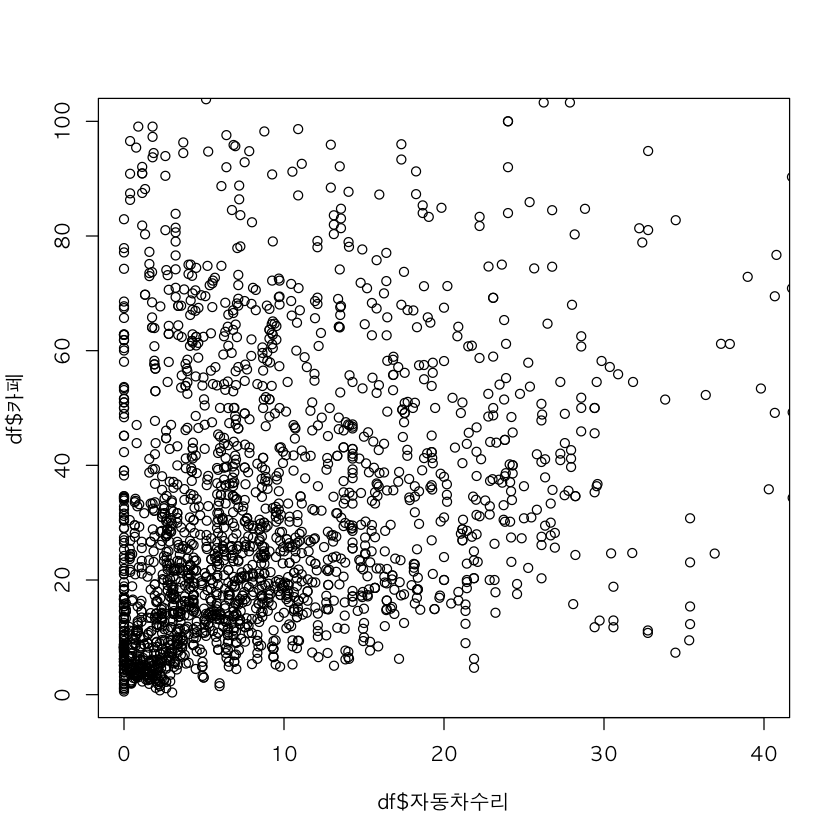

In [48]:

par(bg = 'white' , family = 'AppleGothic')
plot(
  df$카페~df$총여성종사자수,
  ylim = c(0,100),
  xlim = c(0,6000)
)
r <- lm(df$카페~df$총여성종사자수) # 수식 
abline(r, col='blue')

#segments(0,0 , 6000,60 , col='red')

plot(
  df$카페~df$한식,
  ylim = c(0,70),
  xlim = c(0,150)
)
r <- lm(df$카페~df$총여성종사자수) # 수식 
abline(r, col='blue')

plot(
  df$카페~df$용달운송,
  ylim = c(0,100),
  xlim = c(0,200)
)
plot(
  df$카페~df$자동차수리,
  ylim = c(0,100),
  xlim = c(0,40)
)

In [71]:
# cor(df, df$카페)

reduced <- data.frame(카페=df$카페, 한식=df$한식, 편의점=df$편의점, 제과점=df$제과점, 부동산=df$부동산, 술집=df$술집, 당구장=df$당구장)

# 회귀분석
model <- lm(카페 ~ . , data = df)
# .은 앞의 컬럼(rating) 을 뺀 모든 컬럼을 뜻함

cor(df$카페, df)

model
summary(model)

df$최적카페지표 <- df$한식*0.5291 + df$편의점*0.4482 - df$제과점*0.4278 - df$술집*0.6015

final <- data.frame(df$최적카페지표, df$카페)

final

final <- as.numeric(unlist(final))

# abs(df$최적카페지표[1693:2115] - df$카페[1693:2115]) == max(abs(df$최적카페지표[1693:2115] - df$카페[1693:2115]))
# max(abs(df$최적카페지표[1693:2115] - df$카페[1693:2115]))

한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,분식,카페,세탁소,...,제과점,PC방,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균,최적카페지표
0.7560572,-0.07679695,0.5403991,0.4230974,0.5741251,0.3603181,0.3509177,0.7117803,1,0.233903,...,0.7622868,0.2721584,0.6065546,0.7031123,0.7348905,0.02153749,-0.01562168,0.09191032,0.09695184,0.6535204



Call:
lm(formula = 카페 ~ ., data = df)

Coefficients:
   (Intercept)            한식        용달운송          부동산          의류점  
    -3.134e+01       1.809e-01      -1.497e-03      -5.451e-02      -1.414e-02  
          술집            미용        슈퍼마켓            분식          세탁소  
     1.540e-01       1.165e-01      -3.166e-01       3.744e-01      -5.145e-01  
        노래방          편의점            치킨      자동차수리        야채가게  
    -3.997e-01       6.647e-01      -1.319e-01      -1.196e-01       1.600e-02  
        정육점          중국집          당구장          제과점            PC방  
    -6.821e-01       1.343e-01      -4.082e-01       1.542e+00      -4.280e-01  
      사업체수      총종사자수  총여성종사자수        운영평균        폐업평균  
     8.677e-04       2.998e-04       1.286e-04      -3.365e-02       6.299e-02  
  서울운영평균  서울시폐업평균    최적카페지표  
    -3.309e-01       1.333e+00              NA  



Call:
lm(formula = 카페 ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.865  -5.821  -0.841   5.054 110.256 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.134e+01  7.374e+00  -4.250 2.23e-05 ***
한식            1.809e-01  1.015e-02  17.818  < 2e-16 ***
용달운송       -1.497e-03  2.827e-03  -0.530 0.596457    
부동산         -5.451e-02  1.532e-02  -3.558 0.000381 ***
의류점         -1.414e-02  3.165e-03  -4.467 8.38e-06 ***
술집            1.540e-01  1.337e-02  11.520  < 2e-16 ***
미용            1.165e-01  2.461e-02   4.733 2.36e-06 ***
슈퍼마켓       -3.166e-01  3.434e-02  -9.220  < 2e-16 ***
분식            3.744e-01  3.856e-02   9.712  < 2e-16 ***
세탁소         -5.145e-01  6.842e-02  -7.521 8.05e-14 ***
노래방         -3.997e-01  2.987e-02 -13.381  < 2e-16 ***
편의점          6.647e-01  5.404e-02  12.299  < 2e-16 ***
치킨           -1.319e-01  6.515e-02  -2.025 0.042972 *  
자동차수리     -1.196e-01  3.886e-02 

df.최적카페지표,df.카페
5.429154,3.147929
7.256494,5.584803
32.163030,20.798301
100.070487,82.396120
92.255257,87.079342
25.223028,31.647940
49.407975,43.511162
138.751062,139.726407
34.125825,41.184211
33.983496,39.212254


In [63]:
1693 + 207

[1] 1900

In [33]:
# 주성분 분석
# p1 <- prcomp(df, scale =T)
# par(bg='white' , family='AppleGothic')
# biplot(p1)

# # 주성분 분석 대표가 되는 컬럼을 찾아 그걸로 주성분 분석할것임
# result <- princomp(df, cor =T)
# summary(result) 
# # comp1 까지 Cumulative Proportion  0.6200604 62퍼를 대변할수있다
# # comp2 까지 더하면 Cumulative Proportion 0.8675017 86퍼를 대변할 수 있다. ... 

# par(bg='white', family="AppleGothic")
# biplot(result)

In [34]:
head(df)

한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,분식,카페,세탁소,...,제과점,PC방,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균,최적카페지표
-1.1416632,-0.5823024,-0.5877937,-0.41009961,-0.9867004,-0.96295518,-0.64075771,-1.1970969,-0.9495505,-0.77638255,...,-1.2003211,-0.9989681,-0.8032163,-0.6974736,-0.78046495,102.0,48.50,94.75,47,-0.1302709
-1.0011732,-0.7780208,-0.9481857,-0.42382081,-0.7945182,-1.05080165,-0.93919193,-1.0426756,-0.8790454,-1.07777353,...,-0.9138952,-0.9139776,-0.8167507,-0.6937155,-0.71999227,99.0,48.50,94.75,47,-0.2056647
-0.4741462,-0.5986072,-0.5167529,-0.31519949,-0.6796405,-0.76752550,-0.91428574,-0.5141604,-0.4388792,-0.39081890,...,-0.8336037,-0.2842638,-0.1597735,-0.1668724,-0.36940175,98.5,43.00,94.75,47,0.2964293
1.6912074,-0.7286974,2.8531622,0.25774702,0.9787997,1.17419868,0.29201220,0.1696302,1.3433065,1.85539656,...,0.1725974,0.3645149,1.4158492,1.8606757,2.07015291,86.0,43.00,94.75,47,1.1289893
1.5023111,-0.8325294,1.1564974,0.01729356,0.6848086,0.07809323,-0.01277144,1.0439663,1.4788044,0.54870425,...,1.4079128,0.4504557,1.0397549,2.5737318,2.49431367,87.5,43.25,94.75,47,0.4442373
-0.5847194,-0.8407404,0.8801126,-0.32423811,-0.7732451,-0.24762316,-0.68966836,0.0720737,-0.1249708,-0.03964972,...,0.8569481,0.6192867,-0.3327959,-0.1159082,0.04493872,93.0,47.25,94.75,47,-0.3610175


In [72]:
# 총 종사자 / 총 여성 종사자 cor 0.9 이상 나오면 둘 중 하나만 사용해야함
# 동네특징도 포함해서 결론을 내는게 더 좋을듯 하다
# 데이터가 많으면 샘플링을 해서 하거나 자치구를 좁혀 분석해야한다
